In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [330]:
age_group = pd.read_csv("C:/Users/Anuradha/Downloads/AgeGroupDetails.csv")
hospitalbeds = pd.read_csv("C:/Users/Anuradha/downloads/HospitalBedsIndia.csv")
individualdetails = pd.read_csv("C:/Users/Anuradha/Downloads/IndividualDetails.csv")
covid_19 =pd.read_csv("C:/Users/Anuradha/Downloads/covid_19_india.csv")


In [331]:
age_group.head()

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%


In [332]:
age_group.shape

(10, 4)

In [333]:
age_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sno         10 non-null     int64 
 1   AgeGroup    10 non-null     object
 2   TotalCases  10 non-null     int64 
 3   Percentage  10 non-null     object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


In [334]:
hospitalbeds.shape

(38, 14)

In [335]:
hospitalbeds=hospitalbeds[:-2]
hospitalbeds.fillna(0,inplace=True)
hospitalbeds.shape

(36, 14)

In [336]:
hospitalbeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sno                               36 non-null     float64
 1   State/UT                          36 non-null     object 
 2   NumPrimaryHealthCenters_HMIS      36 non-null     object 
 3   NumCommunityHealthCenters_HMIS    36 non-null     object 
 4   NumSubDistrictHospitals_HMIS      36 non-null     object 
 5   NumDistrictHospitals_HMIS         36 non-null     object 
 6   TotalPublicHealthFacilities_HMIS  36 non-null     object 
 7   NumPublicBeds_HMIS                36 non-null     object 
 8   NumRuralHospitals_NHP18           36 non-null     float64
 9   NumRuralBeds_NHP18                36 non-null     float64
 10  NumUrbanHospitals_NHP18           36 non-null     float64
 11  NumUrbanBeds_NHP18                36 non-null     float64
 12  Unnamed: 1

In [337]:
individualdetails.shape

(1304, 12)

In [338]:
hospitalbeds.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Unnamed: 12,Unnamed: 13
0,1.0,Andaman & Nicobar Islands,27,4,0,3,34,1246,27.0,575.0,3.0,500.0,0.0,0.0
1,2.0,Andhra Pradesh,1417,198,31,20,1666,60799,193.0,6480.0,65.0,16658.0,0.0,0.0
2,3.0,Arunachal Pradesh,122,62,0,15,199,2320,208.0,2136.0,10.0,268.0,0.0,0.0
3,4.0,Assam,1007,166,14,33,1220,19115,1176.0,10944.0,50.0,6198.0,0.0,0.0
4,5.0,Bihar,2007,63,33,43,2146,17796,930.0,6083.0,103.0,5936.0,0.0,0.0


In [339]:
hospitalbeds.columns[2:]

Index(['NumPrimaryHealthCenters_HMIS', 'NumCommunityHealthCenters_HMIS',
       'NumSubDistrictHospitals_HMIS', 'NumDistrictHospitals_HMIS',
       'TotalPublicHealthFacilities_HMIS', 'NumPublicBeds_HMIS',
       'NumRuralHospitals_NHP18', 'NumRuralBeds_NHP18',
       'NumUrbanHospitals_NHP18', 'NumUrbanBeds_NHP18', 'Unnamed: 12',
       'Unnamed: 13'],
      dtype='object')

In [340]:
for col in hospitalbeds.columns[2:]:
    if hospitalbeds[col].dtype == "object":
        hospitalbeds[col]=hospitalbeds[col].astype('int64')
    

In [341]:
hospitalbeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sno                               36 non-null     float64
 1   State/UT                          36 non-null     object 
 2   NumPrimaryHealthCenters_HMIS      36 non-null     int64  
 3   NumCommunityHealthCenters_HMIS    36 non-null     int64  
 4   NumSubDistrictHospitals_HMIS      36 non-null     int64  
 5   NumDistrictHospitals_HMIS         36 non-null     int64  
 6   TotalPublicHealthFacilities_HMIS  36 non-null     int64  
 7   NumPublicBeds_HMIS                36 non-null     int64  
 8   NumRuralHospitals_NHP18           36 non-null     float64
 9   NumRuralBeds_NHP18                36 non-null     float64
 10  NumUrbanHospitals_NHP18           36 non-null     float64
 11  NumUrbanBeds_NHP18                36 non-null     float64
 12  Unnamed: 1

In [342]:
individualdetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  1304 non-null   int64 
 1   government_id       257 non-null    object
 2   diagnosed_date      1304 non-null   object
 3   age                 485 non-null    object
 4   gender              533 non-null    object
 5   detected_city       643 non-null    object
 6   detected_district   955 non-null    object
 7   detected_state      1085 non-null   object
 8   nationality         414 non-null    object
 9   current_status      1085 non-null   object
 10  status_change_date  1082 non-null   object
 11  notes               1060 non-null   object
dtypes: int64(1), object(11)
memory usage: 122.4+ KB


In [343]:
covid_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       500 non-null    int64 
 1   Date                      500 non-null    object
 2   Time                      500 non-null    object
 3   State/UnionTerritory      500 non-null    object
 4   ConfirmedIndianNational   500 non-null    object
 5   ConfirmedForeignNational  500 non-null    object
 6   Cured                     500 non-null    int64 
 7   Deaths                    500 non-null    int64 
 8   Confirmed                 500 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 35.3+ KB


In [344]:
covid_19.shape

(500, 9)

In [345]:
covid_19.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [346]:
covid_19['Date'] = pd.to_datetime(covid_19['Date'])
covid_19.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-01-02,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-03-02,6:00 PM,Kerala,3,0,0,0,3


In [347]:
individualdetails.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,NaN


# data analysis and visualization

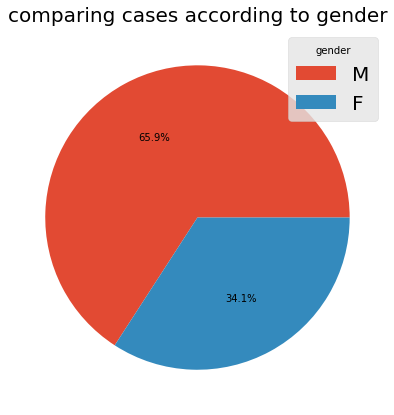

In [348]:
%matplotlib inline
gender = individualdetails.gender
gender.dropna(inplace = True)
gender =gender.value_counts()  
plt.figure(figsize=(10,7))
plt.pie(gender,autopct = '%1.1f%%')
plt.title("comparing cases according to gender",fontsize = 20)
plt.legend(gender.index,loc = "best",title = "gender",fontsize =20)

plt.show()

In [349]:
age_group['Percentage'] = age_group['Percentage'].str.rstrip('%').astype('float')

In [350]:
age_group['Percentage']

0     3.18
1     3.90
2    24.86
3    21.10
4    16.18
5    11.13
6    12.86
7     4.05
8     1.45
9     1.30
Name: Percentage, dtype: float64

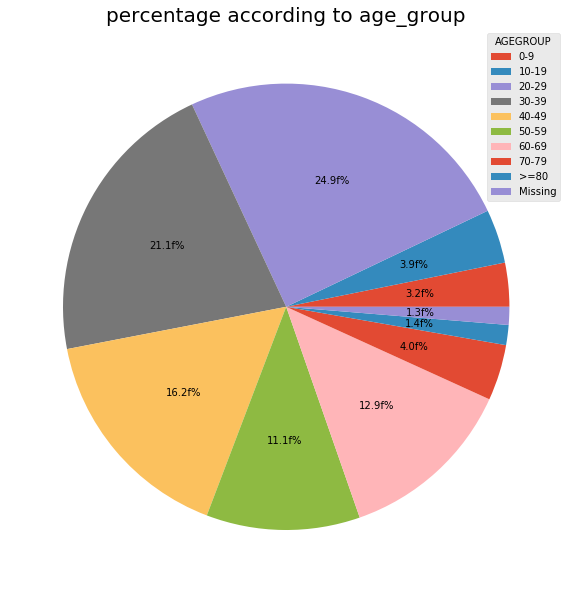

In [352]:
%matplotlib inline
plt.figure(figsize=(10,20))
labels = age_group['AgeGroup']
plt.title("percentage according to age_group",fontsize = 20)
plt.pie(age_group['Percentage'],autopct='%1.1ff%%')
plt.legend(labels,loc = 'best',title = 'AGEGROUP')  
 
plt.show()

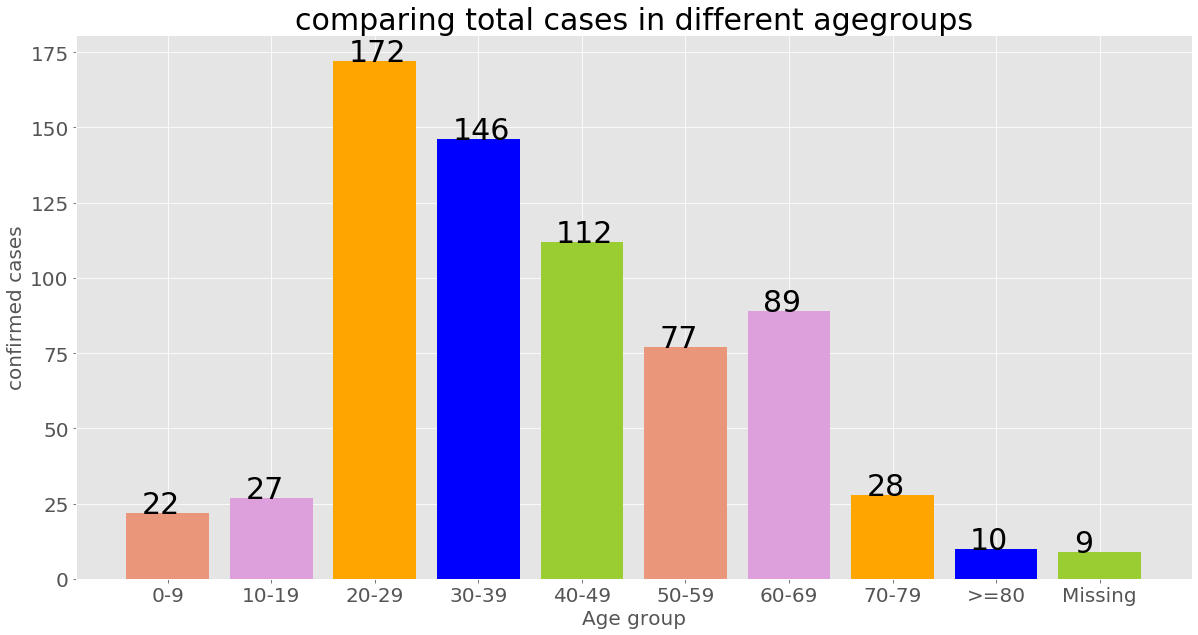

In [354]:
%matplotlib inline
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
plt.bar(age_group['AgeGroup'],age_group['TotalCases'],color=['darksalmon','plum','orange','blue','yellowgreen'],linewidth=3)
plt.xlabel("Age group",fontsize=20)
plt.ylabel("confirmed cases",fontsize=20)
plt.title("comparing total cases in different agegroups",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
for i,v in enumerate(age_group['TotalCases']):
  plt.text(i-.25,v,age_group["TotalCases"][i],fontsize=30)
plt.show()

In [355]:
hospitalbeds.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Unnamed: 12,Unnamed: 13
0,1.0,Andaman & Nicobar Islands,27,4,0,3,34,1246,27.0,575.0,3.0,500.0,0.0,0.0
1,2.0,Andhra Pradesh,1417,198,31,20,1666,60799,193.0,6480.0,65.0,16658.0,0.0,0.0
2,3.0,Arunachal Pradesh,122,62,0,15,199,2320,208.0,2136.0,10.0,268.0,0.0,0.0
3,4.0,Assam,1007,166,14,33,1220,19115,1176.0,10944.0,50.0,6198.0,0.0,0.0
4,5.0,Bihar,2007,63,33,43,2146,17796,930.0,6083.0,103.0,5936.0,0.0,0.0


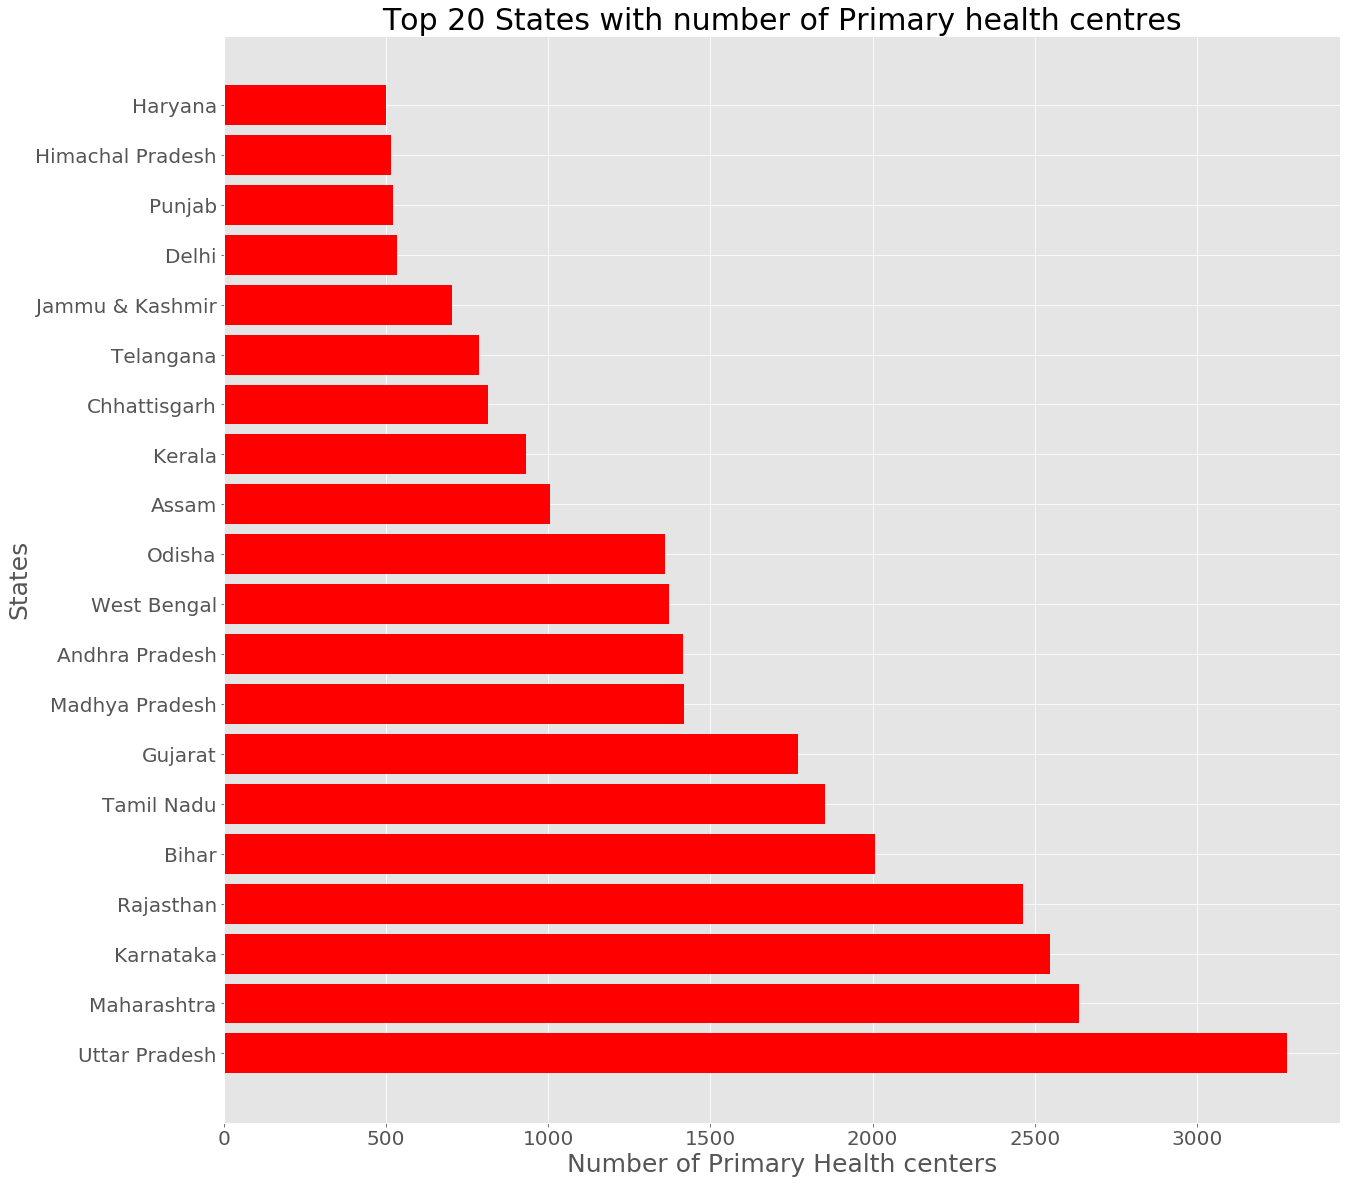

In [356]:
top20 = hospitalbeds.nlargest(20,"NumPrimaryHealthCenters_HMIS")
plt.figure(figsize=(20,20))
plt.title('Top 20 States with number of Primary health centres',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Primary Health centers',fontsize=25)
plt.ylabel('States',fontsize=25)
plt.barh(top20['State/UT'],top20['NumPrimaryHealthCenters_HMIS'],color='red',linewidth=3)
plt.show()

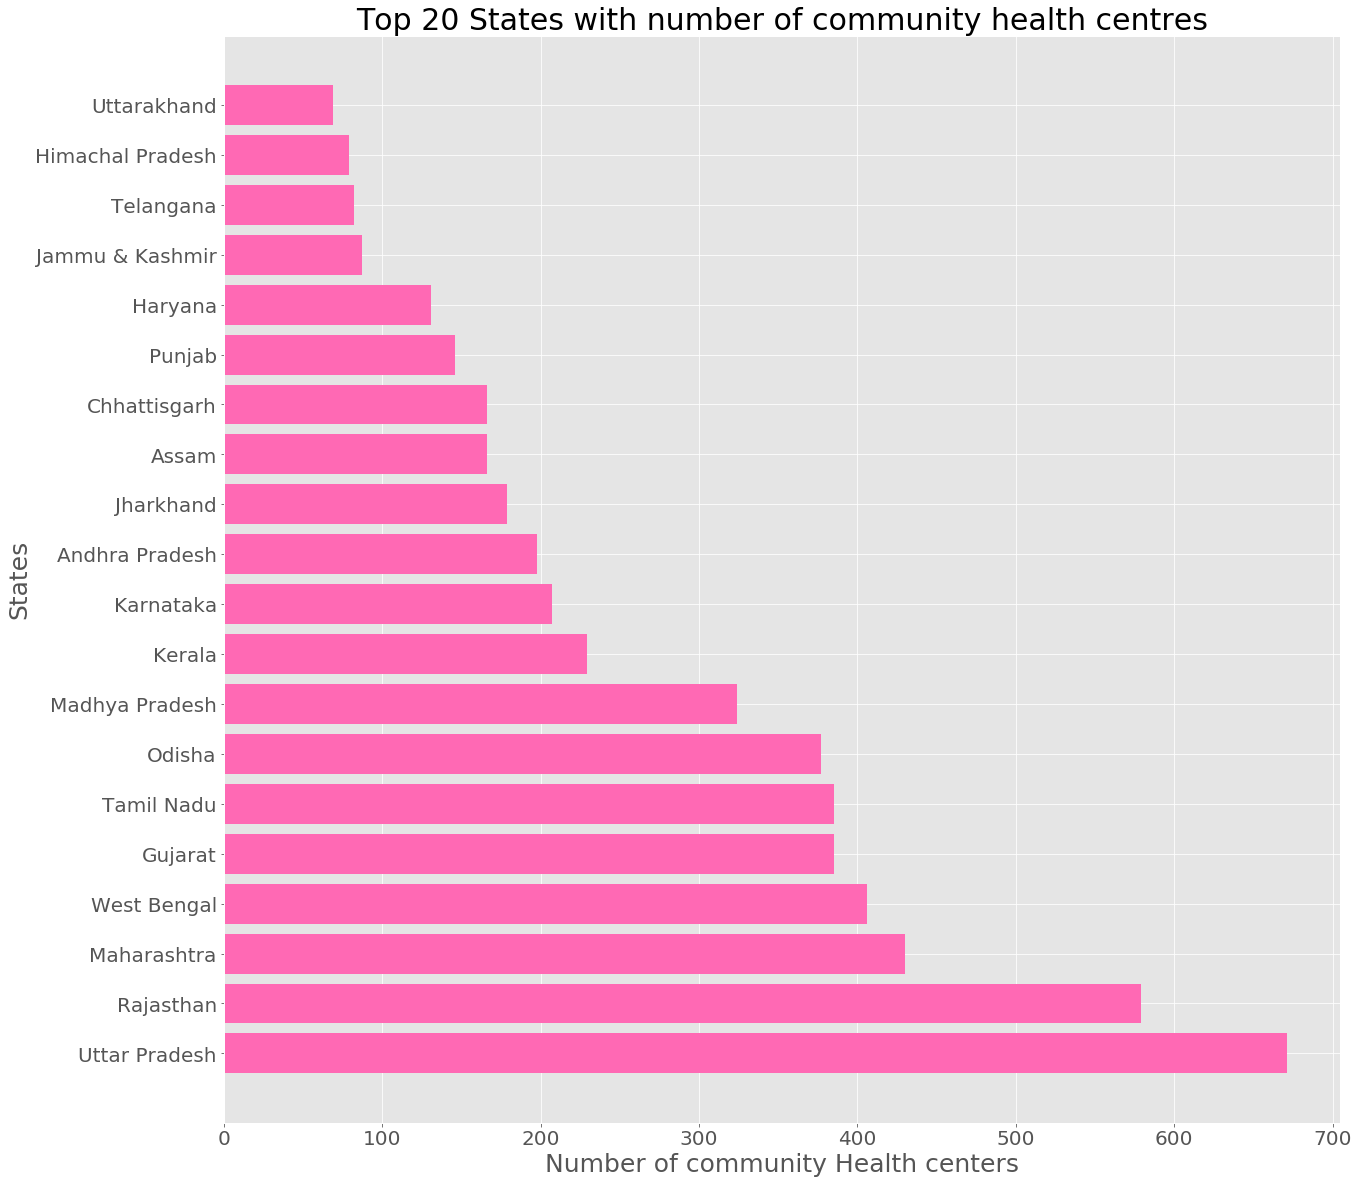

In [357]:
top20 = hospitalbeds.nlargest(20,"NumCommunityHealthCenters_HMIS")
plt.figure(figsize=(20,20))
plt.title('Top 20 States with number of community health centres',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of community Health centers',fontsize=25)
plt.ylabel('States',fontsize=25)
plt.barh(top20['State/UT'],top20['NumCommunityHealthCenters_HMIS'],color='hotpink',linewidth=3)
plt.show()

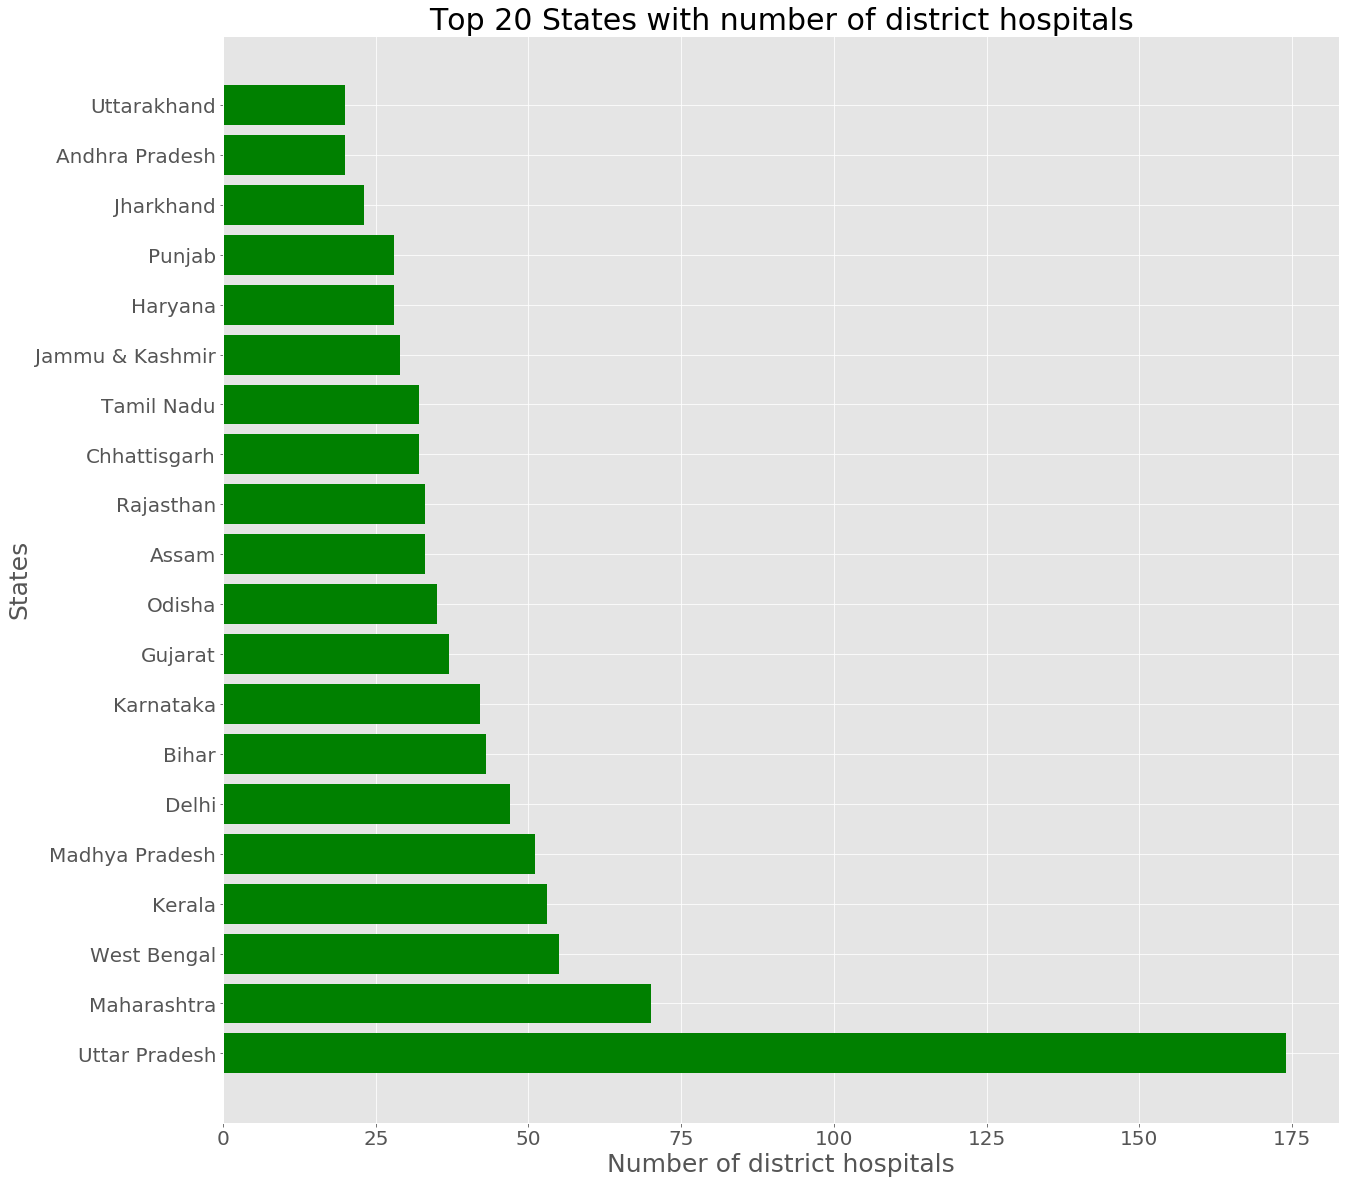

In [358]:
top20 = hospitalbeds.nlargest(20,"NumDistrictHospitals_HMIS")
plt.figure(figsize=(20,20))
plt.title('Top 20 States with number of district hospitals',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of district hospitals',fontsize=25)
plt.ylabel('States',fontsize=25)
plt.barh(top20['State/UT'],top20['NumDistrictHospitals_HMIS'],color='green',linewidth=3)
plt.show()

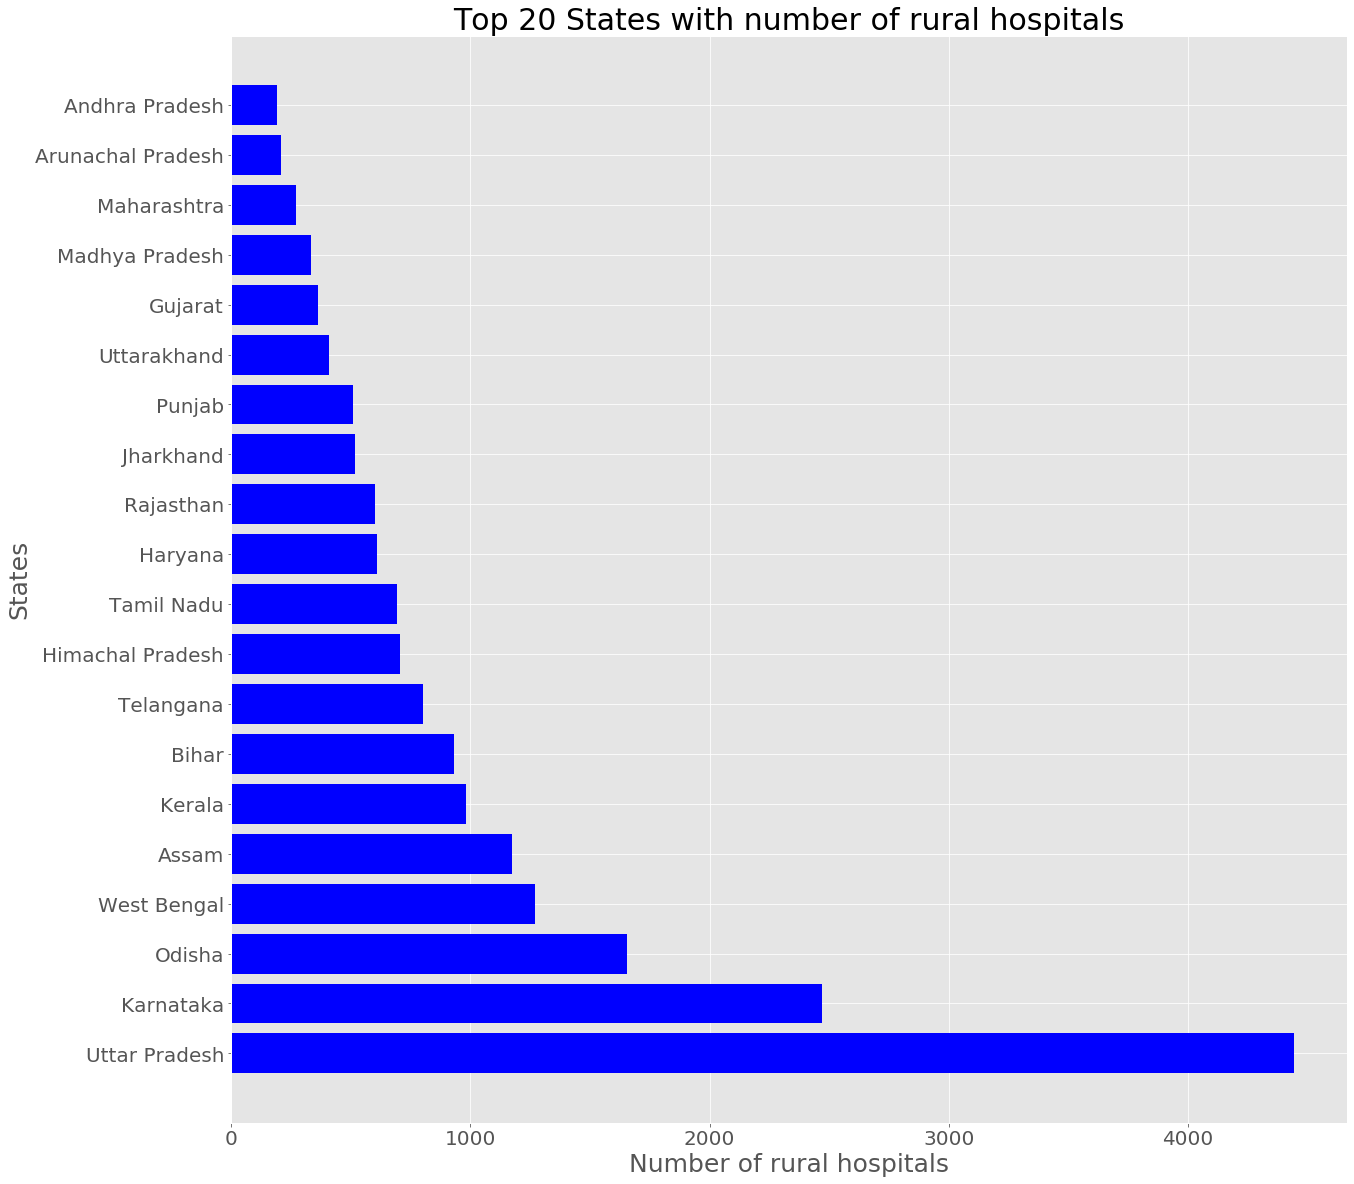

In [359]:
top20 = hospitalbeds.nlargest(20,"NumRuralHospitals_NHP18")
plt.figure(figsize=(20,20))
plt.title('Top 20 States with number of rural hospitals',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of rural hospitals',fontsize=25)
plt.ylabel('States',fontsize=25)
plt.barh(top20['State/UT'],top20['NumRuralHospitals_NHP18'],color='blue',linewidth=3)
plt.show()

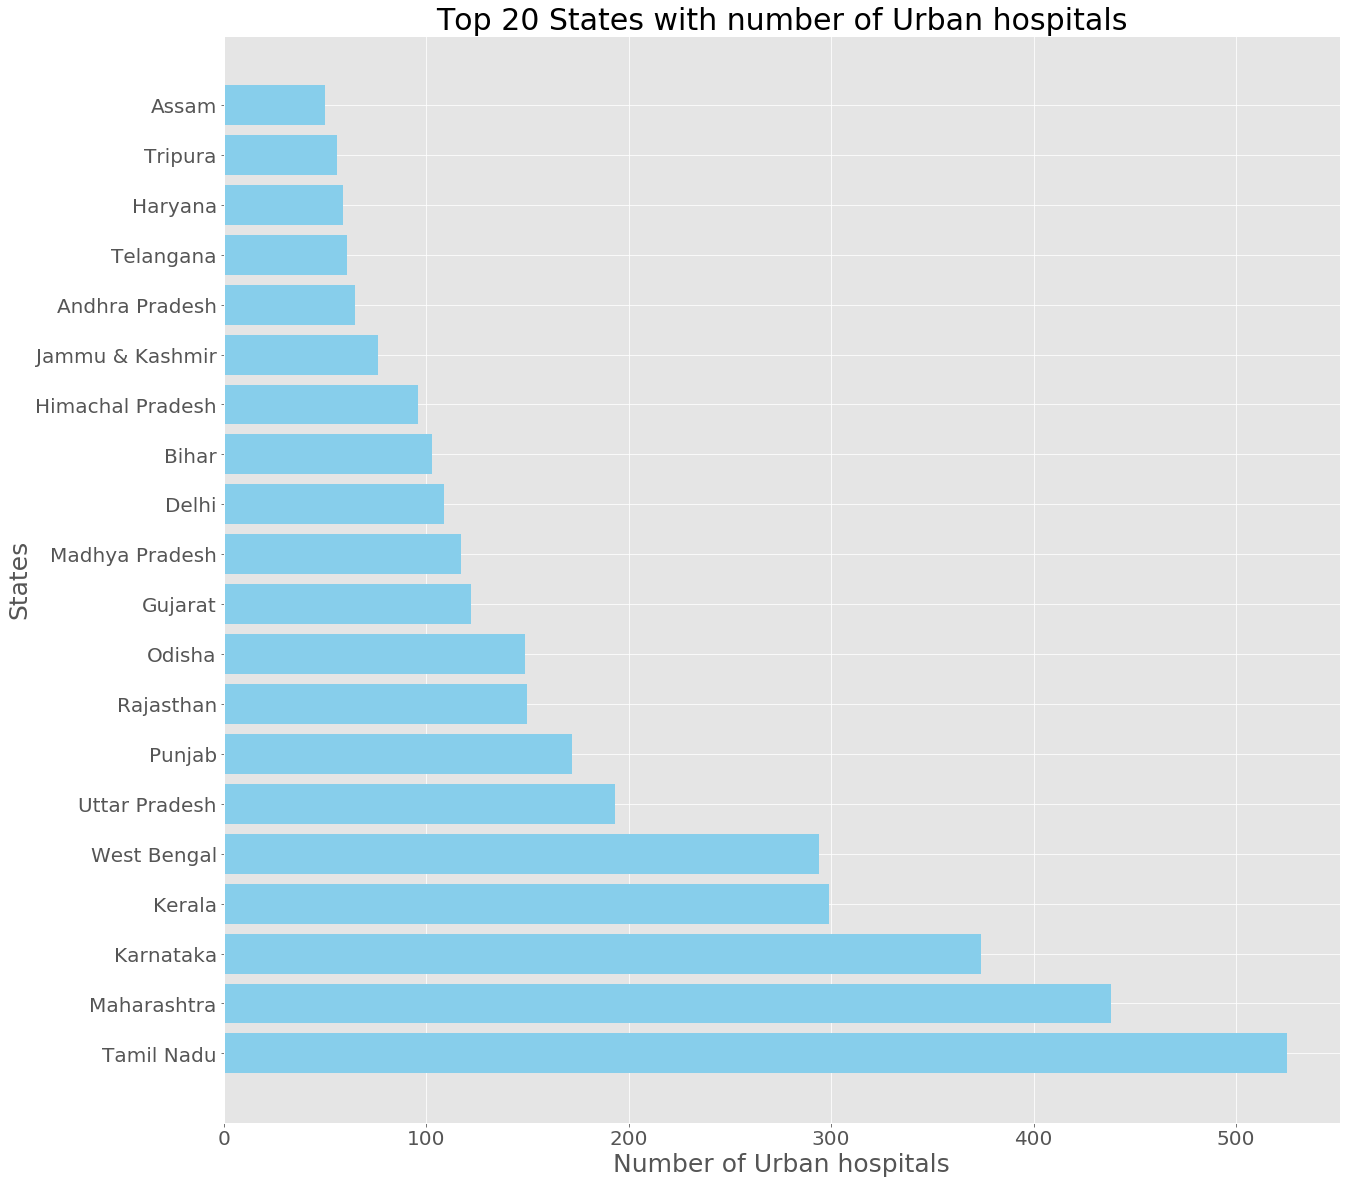

In [360]:
top20 = hospitalbeds.nlargest(20,"NumUrbanHospitals_NHP18")
plt.figure(figsize=(20,20))
plt.title('Top 20 States with number of Urban hospitals',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Urban hospitals',fontsize=25)
plt.ylabel('States',fontsize=25)
plt.barh(top20['State/UT'],top20['NumUrbanHospitals_NHP18'],color='skyblue',linewidth=3)
plt.show()

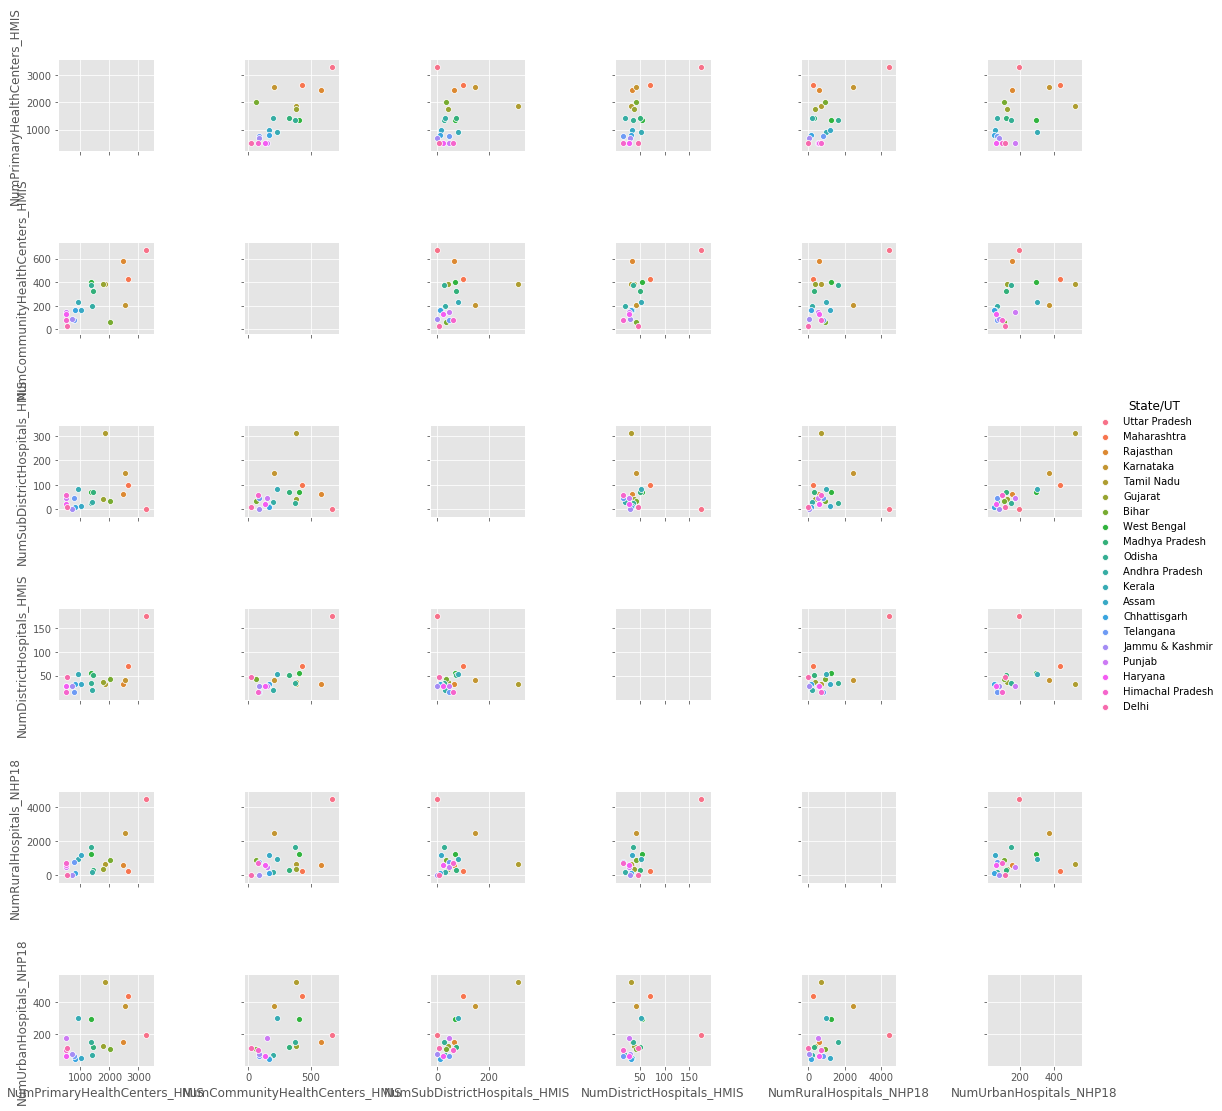

In [361]:
top20=hospitalbeds.nlargest(20,'TotalPublicHealthFacilities_HMIS')
top20=top20[['State/UT','NumPrimaryHealthCenters_HMIS','NumCommunityHealthCenters_HMIS'      
                    ,'NumSubDistrictHospitals_HMIS','NumDistrictHospitals_HMIS'                 
                    ,'NumRuralHospitals_NHP18' ,'NumUrbanHospitals_NHP18']]
sns.pairplot(top20,hue='State/UT')

In [362]:
covid_19.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-01-02,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-03-02,6:00 PM,Kerala,3,0,0,0,3


In [363]:
df = covid_19.groupby("Date")[['Cured','Deaths','Confirmed']].sum()

In [364]:
df.head()

,Cured,Deaths,Confirmed
Date,,,
2020-01-02,0,0,2
2020-01-03,0,0,3
2020-01-30,0,0,1
2020-01-31,0,0,1
2020-02-02,0,0,3


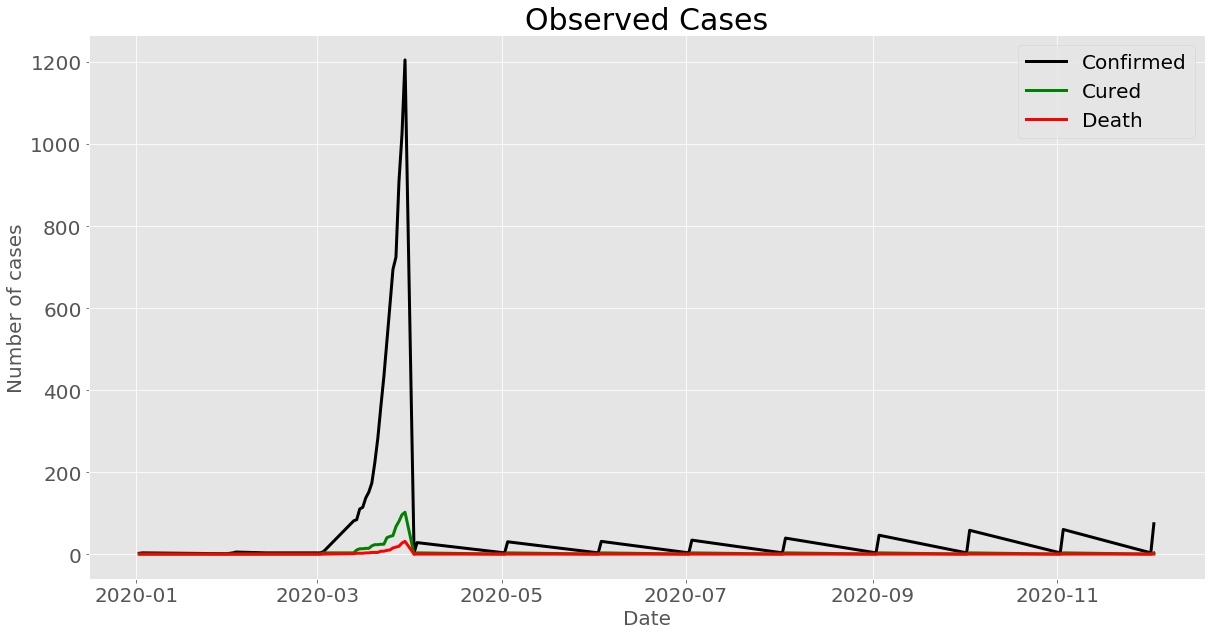

In [365]:
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
plt.title('Observed Cases',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Number of cases',fontsize=20)
plt.plot(df.index,df['Confirmed'],linewidth=3,label='Confirmed',color='black')
plt.plot(df.index,df['Cured'],linewidth=3,label='Cured',color='green')
plt.plot(df.index,df['Deaths'],linewidth=3,label='Death',color='red')
plt.legend(fontsize=20)


In [366]:
df1 = covid_19.groupby('State/UnionTerritory')[['Cured','Deaths','Confirmed']].sum()

In [367]:
df1.head()

,Cured,Deaths,Confirmed
State/UnionTerritory,,,
Andaman and Nicobar Islands,0,0,26
Andhra Pradesh,6,0,123
Bihar,0,9,58
Chandigarh,0,0,66
Chattisgarh,0,0,1


In [368]:
df1.index

Index(['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Bihar', 'Chandigarh',
       'Chattisgarh', 'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Karnataka', 'Kerala',
       'Ladakh', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Mizoram',
       'Odisha', 'Pondicherry', 'Puducherry', 'Punjab', 'Rajasthan',
       'Tamil Nadu', 'Telengana', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'],
      dtype='object', name='State/UnionTerritory')

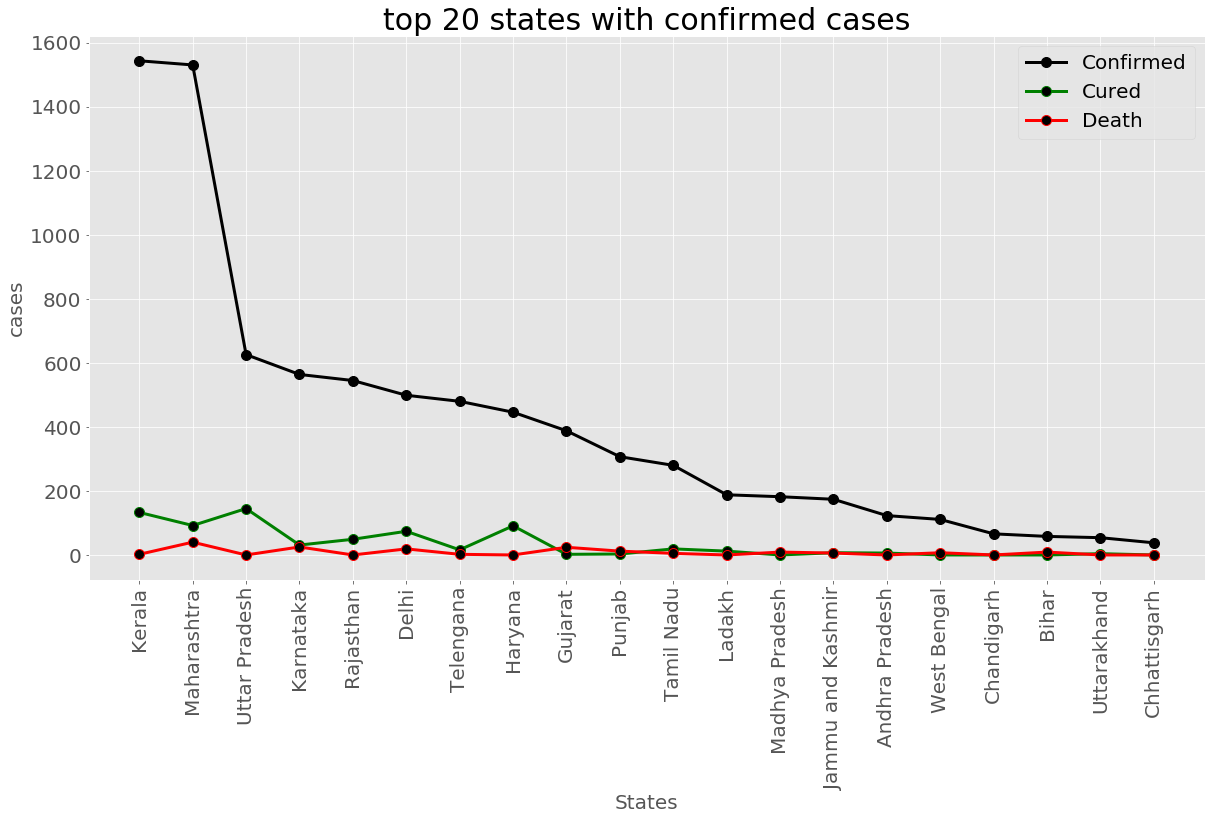

In [369]:
df1=df1.nlargest(20,'Confirmed')
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
plt.title('top 20 states with confirmed cases',fontsize=30)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('States',fontsize=20)
plt.ylabel('cases',fontsize=20)
plt.plot(df1.index,df1['Confirmed'],linewidth=3,marker='o',markersize=10,mfc='black',label='Confirmed',color='black')
plt.plot(df1.index,df1['Cured'],linewidth=3,marker='o',mfc='black',markersize=10,label='Cured',color='green')
plt.plot(df1.index,df1['Deaths'],linewidth=3,marker='o',mfc='black',markersize=10,label='Death',color='red')
plt.legend(fontsize=20)


In [370]:
covid_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       500 non-null    int64         
 1   Date                      500 non-null    datetime64[ns]
 2   Time                      500 non-null    object        
 3   State/UnionTerritory      500 non-null    object        
 4   ConfirmedIndianNational   500 non-null    object        
 5   ConfirmedForeignNational  500 non-null    object        
 6   Cured                     500 non-null    int64         
 7   Deaths                    500 non-null    int64         
 8   Confirmed                 500 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 35.3+ KB


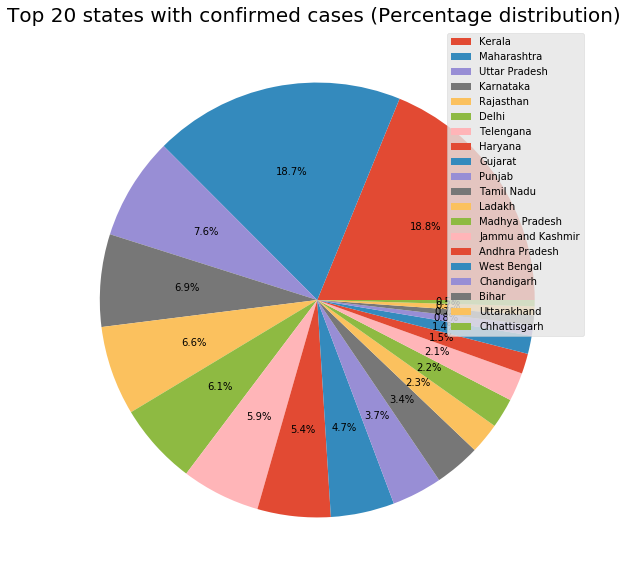

In [371]:
%matplotlib inline
plt.figure(figsize=(25,10))    
plt.title('Top 20 states with confirmed cases (Percentage distribution) ',fontsize=20)
plt.pie(df1.Confirmed,autopct='%1.1f%%')
plt.legend(df1.index,loc='upper right')
plt.show()

In [373]:
covid_19['ConfirmedIndianNational'].replace('-',0,inplace=True)
covid_19['ConfirmedForeignNational'].replace('-',0,inplace=True)

In [374]:
covid_19['ConfirmedIndianNational']=covid_19['ConfirmedIndianNational'].astype('int64')
covid_19['ConfirmedForeignNational']=covid_19['ConfirmedForeignNational'].astype('int64')

In [375]:
df2=covid_19.groupby('State/UnionTerritory')['ConfirmedIndianNational','ConfirmedForeignNational'].sum()



In [376]:
df3=df2.nlargest(20,'ConfirmedIndianNational')
df4=df2.nlargest(20,'ConfirmedForeignNational')


<BarContainer object of 20 artists>

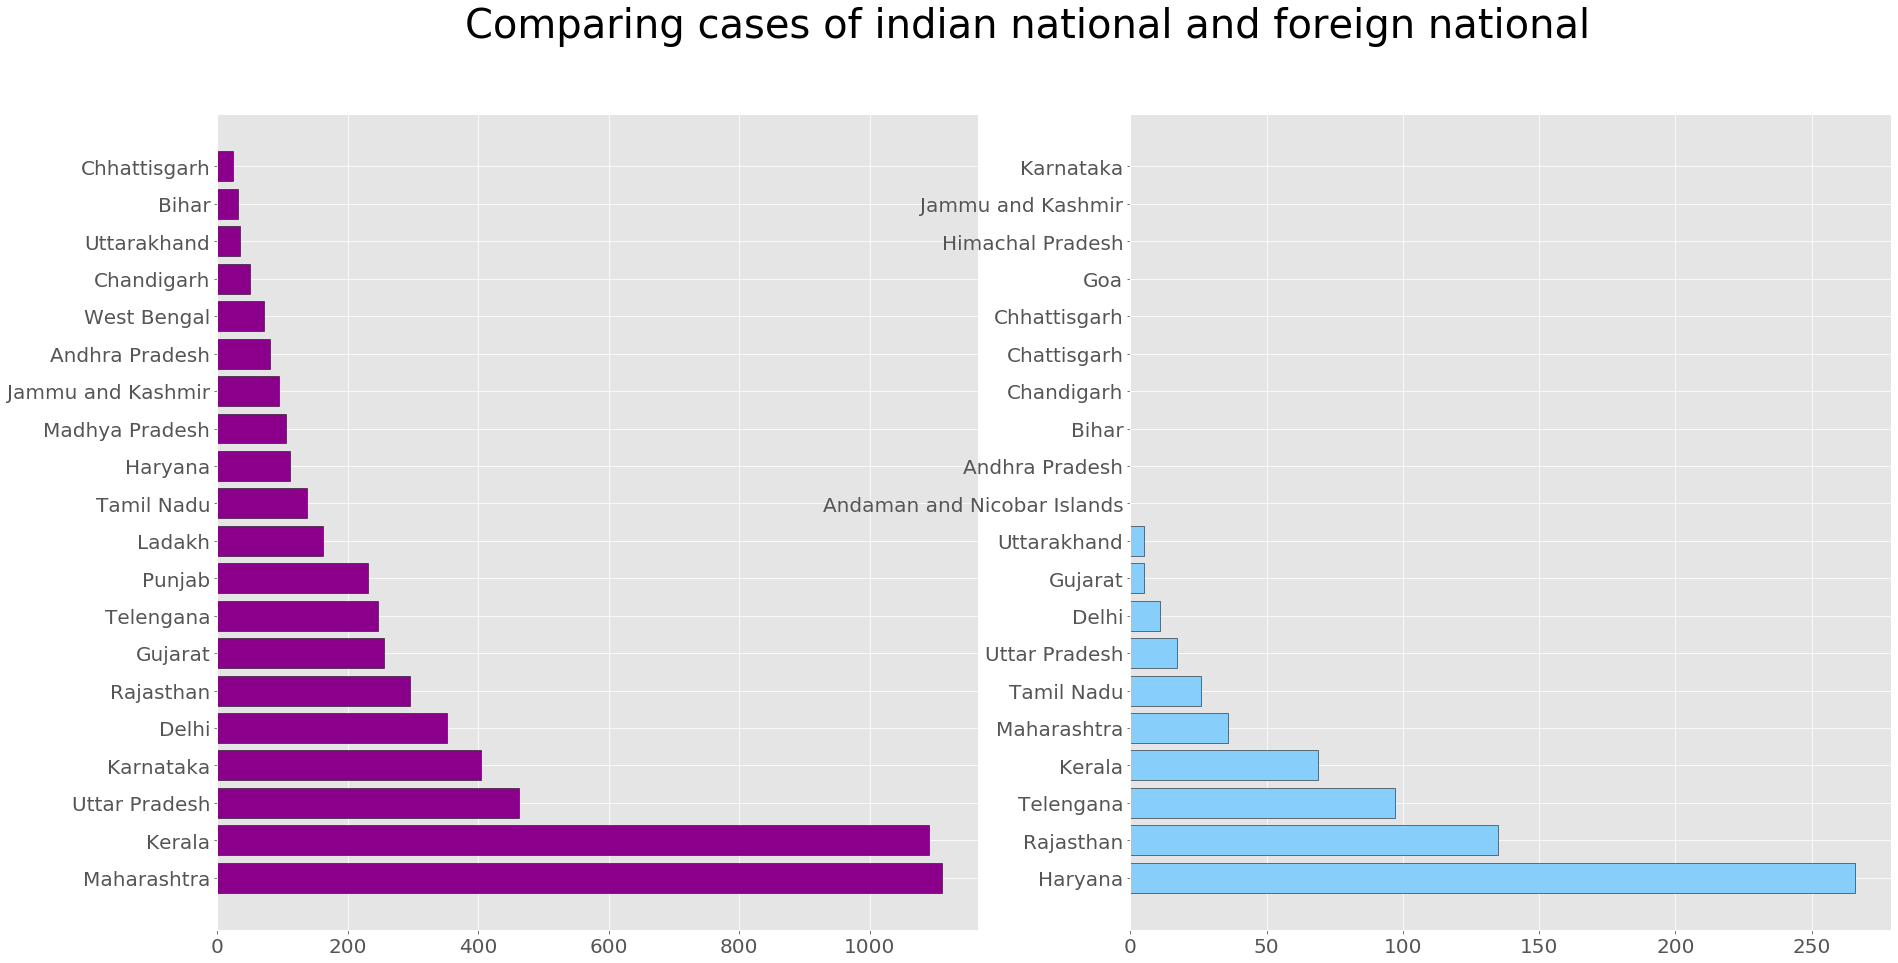

In [377]:
plt.figure(figsize=(30,15))
plt.suptitle('Comparing cases of indian national and foreign national',fontsize=40)
plt.subplot(121)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.barh(df3.index,df3.ConfirmedIndianNational,color='darkmagenta',edgecolor='black')
plt.subplot(122)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.barh(df4.index,df4.ConfirmedForeignNational,color='lightskyblue',edgecolor='black')

<BarContainer object of 20 artists>

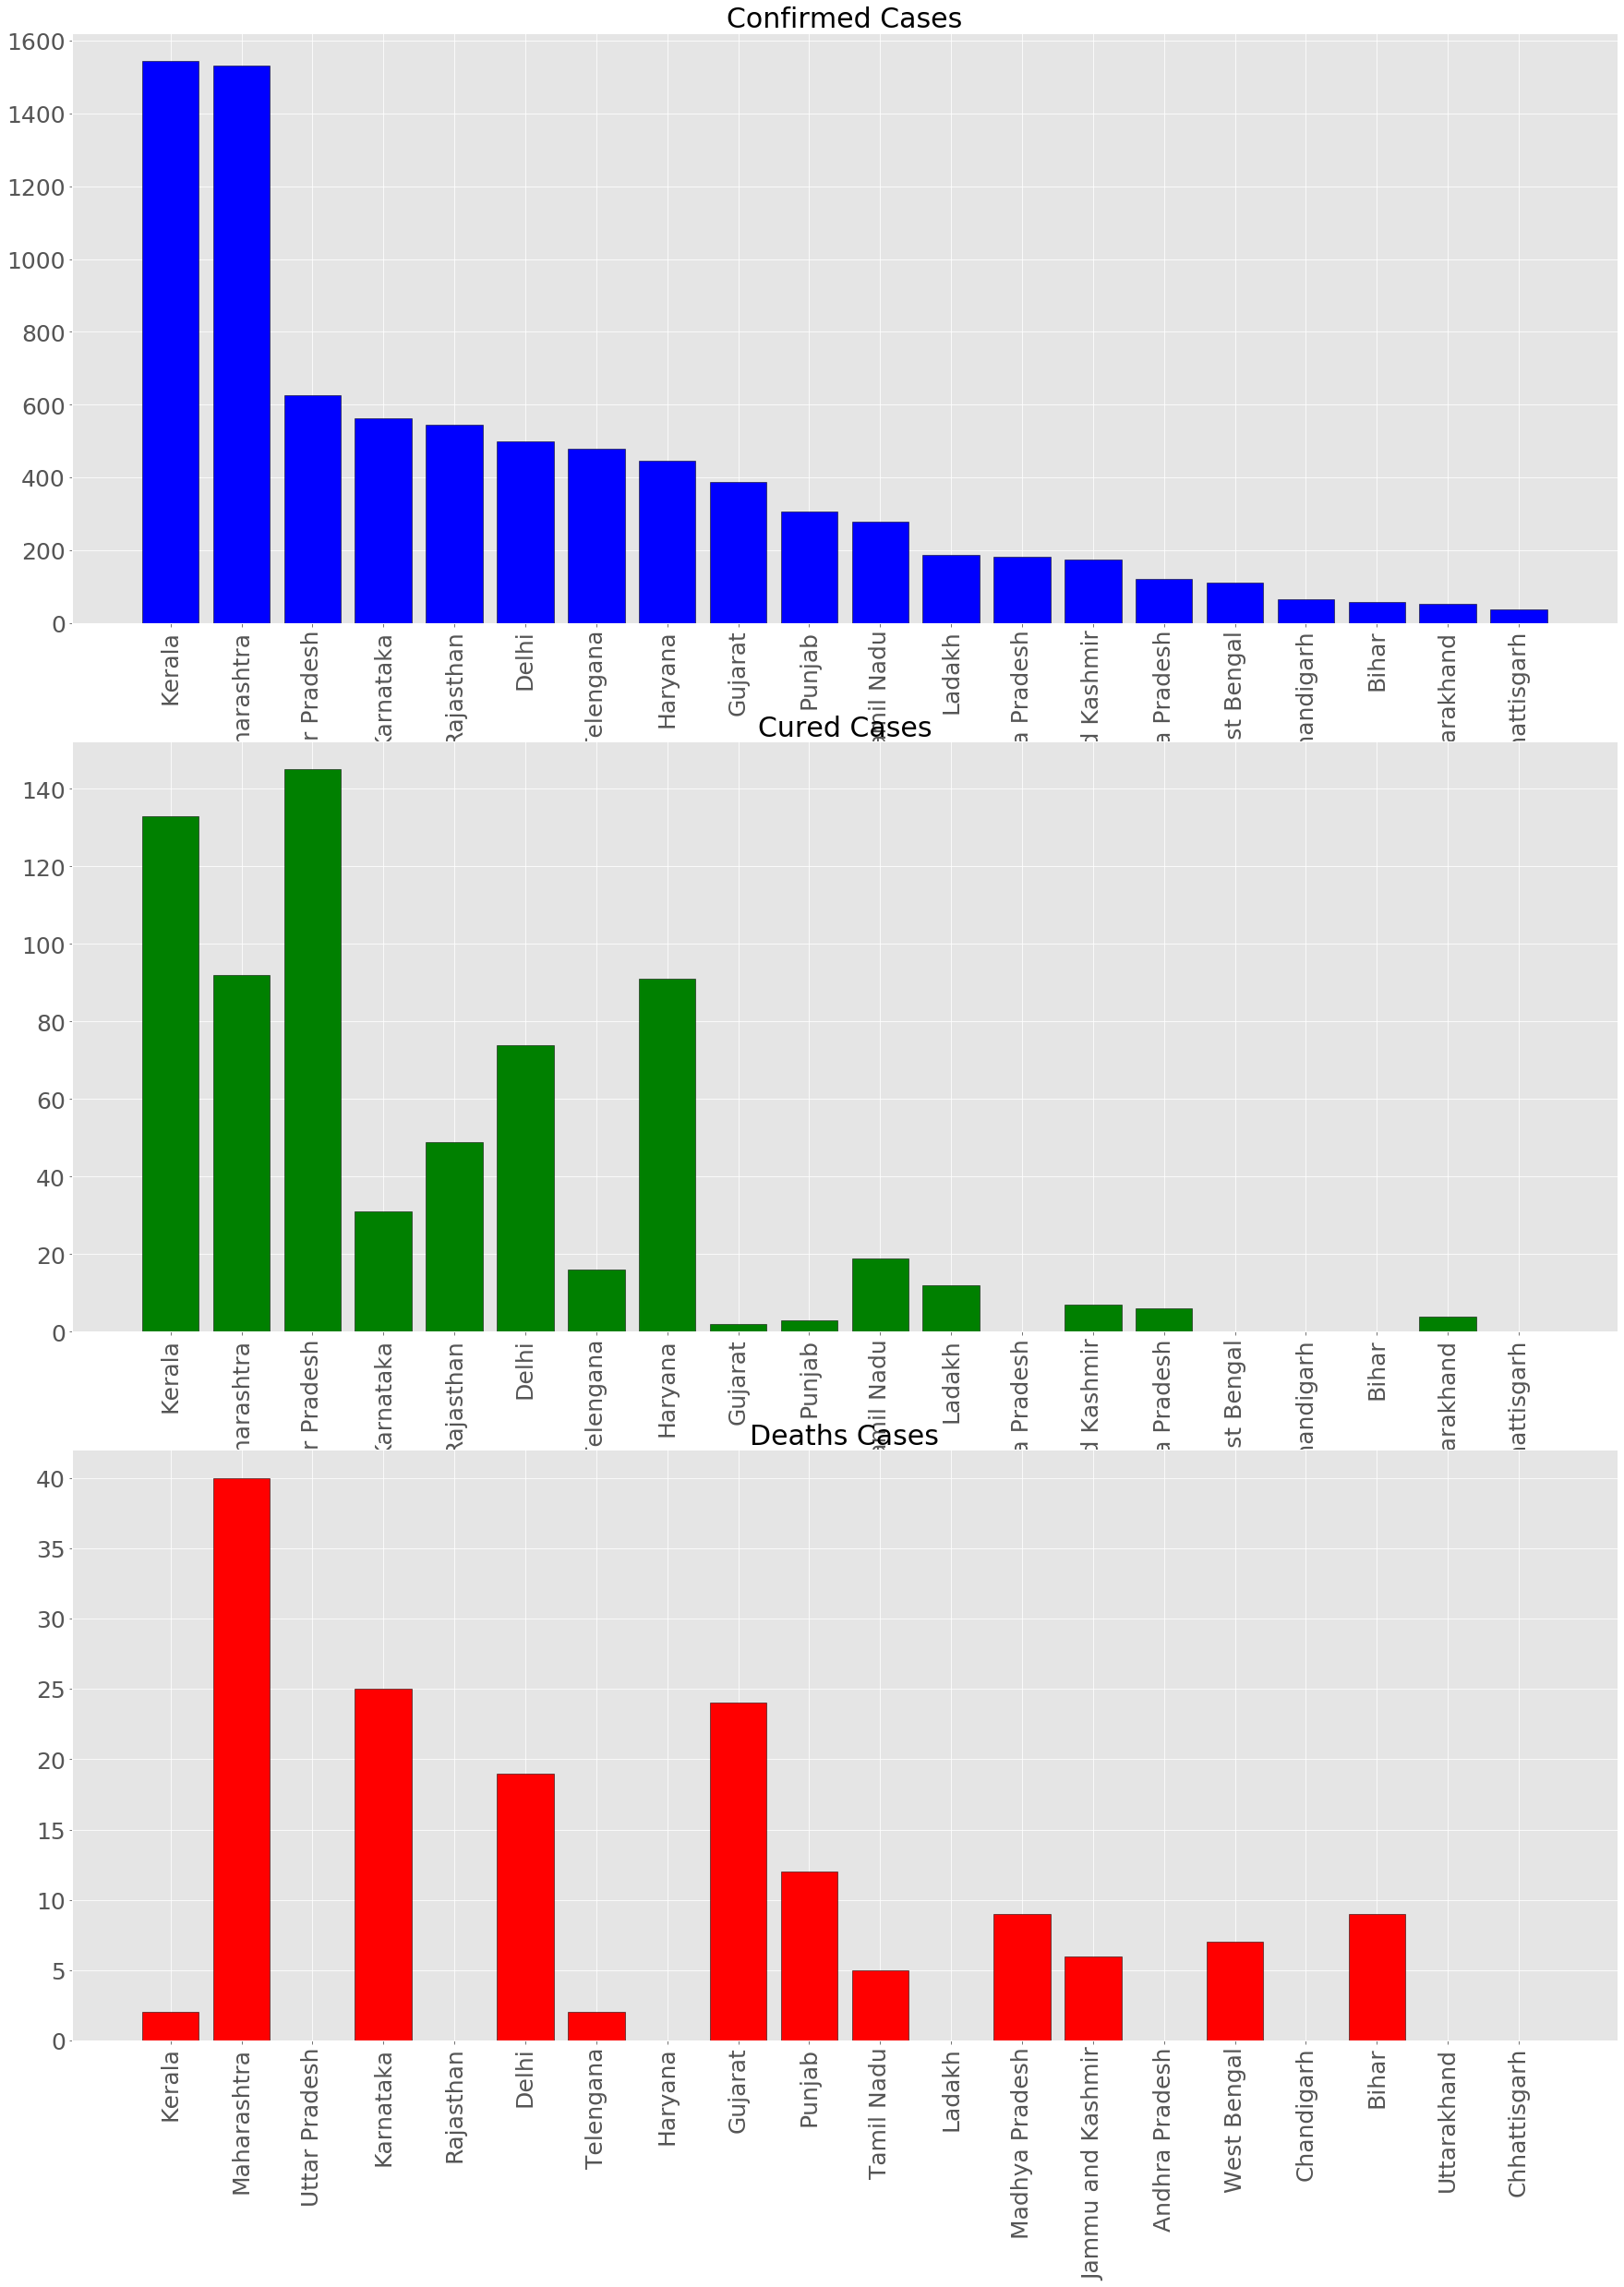

In [378]:
plt.figure(figsize=(30,40))
plt.subplot(311)
plt.title('Confirmed Cases',fontsize=30)
plt.xticks(rotation=90,fontsize=25)
plt.yticks(fontsize=25)
plt.bar(df1.index,df1.Confirmed,color='blue',edgecolor='black')
plt.subplot(312)
plt.title('Cured Cases',fontsize=30)
plt.xticks(rotation=90,fontsize=25)
plt.yticks(fontsize=25)
plt.bar(df1.index,df1.Cured,color='green',edgecolor='black')
plt.subplot(313)
plt.title('Deaths Cases',fontsize=30)
plt.xticks(rotation=90,fontsize=25)
plt.yticks(fontsize=25)
plt.bar(df1.index,df1.Deaths,color='red',edgecolor='black')

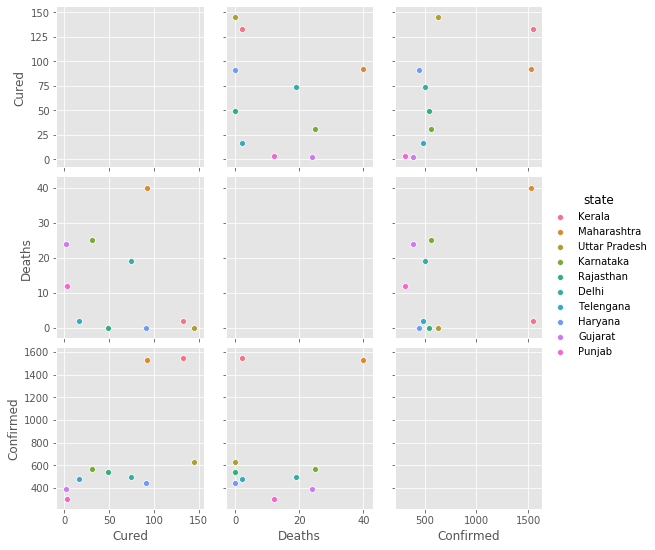

In [379]:
df1=df1.nlargest(10,'Confirmed')
df1['state']=df1.index
sns.pairplot(df1,hue='state')

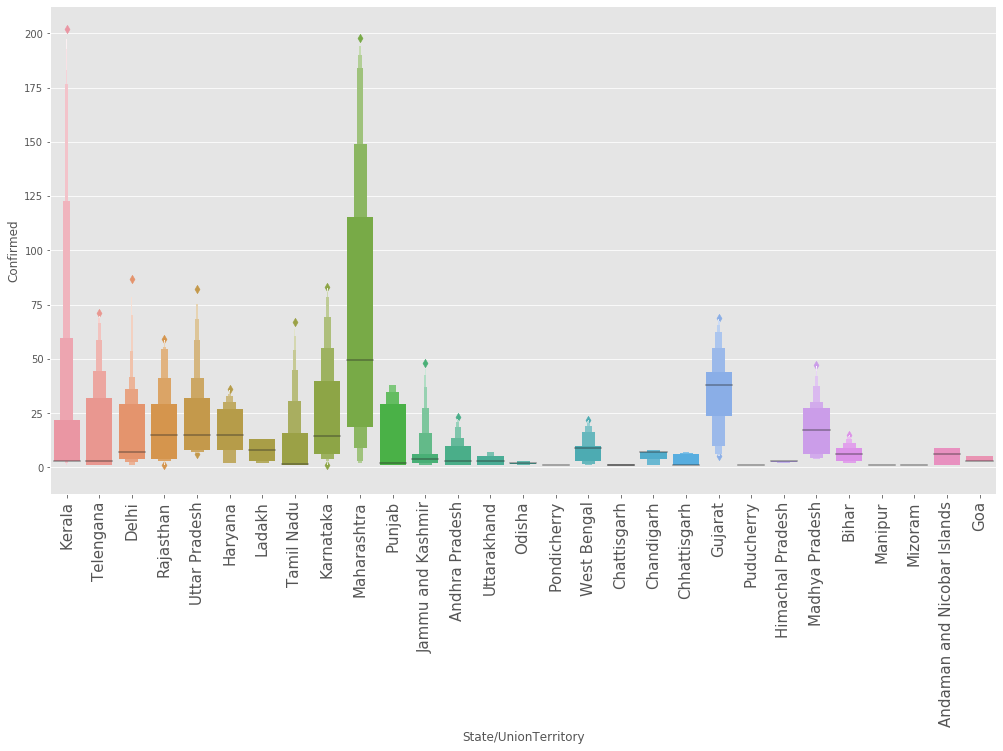

In [380]:
g=sns.catplot(x='State/UnionTerritory',y='Confirmed',kind='boxen',data=covid_19)
g.fig.set_figwidth(20)
g.fig.set_figheight(8)
g.set_xticklabels(rotation=90,fontsize=15)

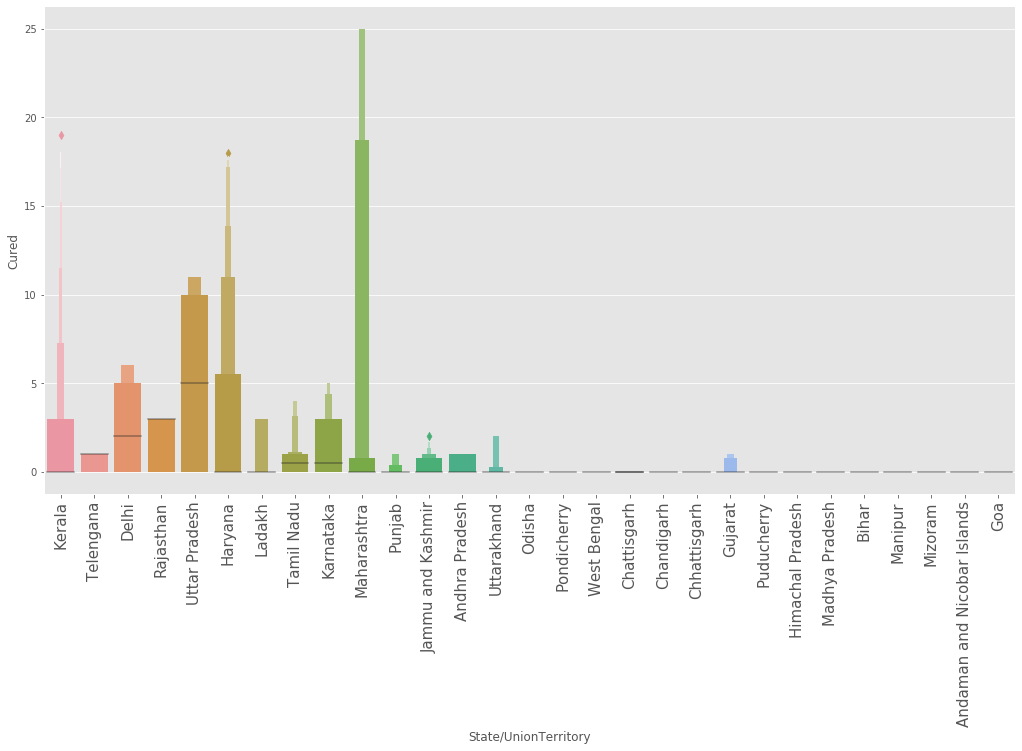

In [381]:
g=sns.catplot(x='State/UnionTerritory',y='Cured',kind='boxen',data=covid_19)
g.fig.set_figwidth(20)
g.fig.set_figheight(8)
g.set_xticklabels(rotation=90,fontsize=15)

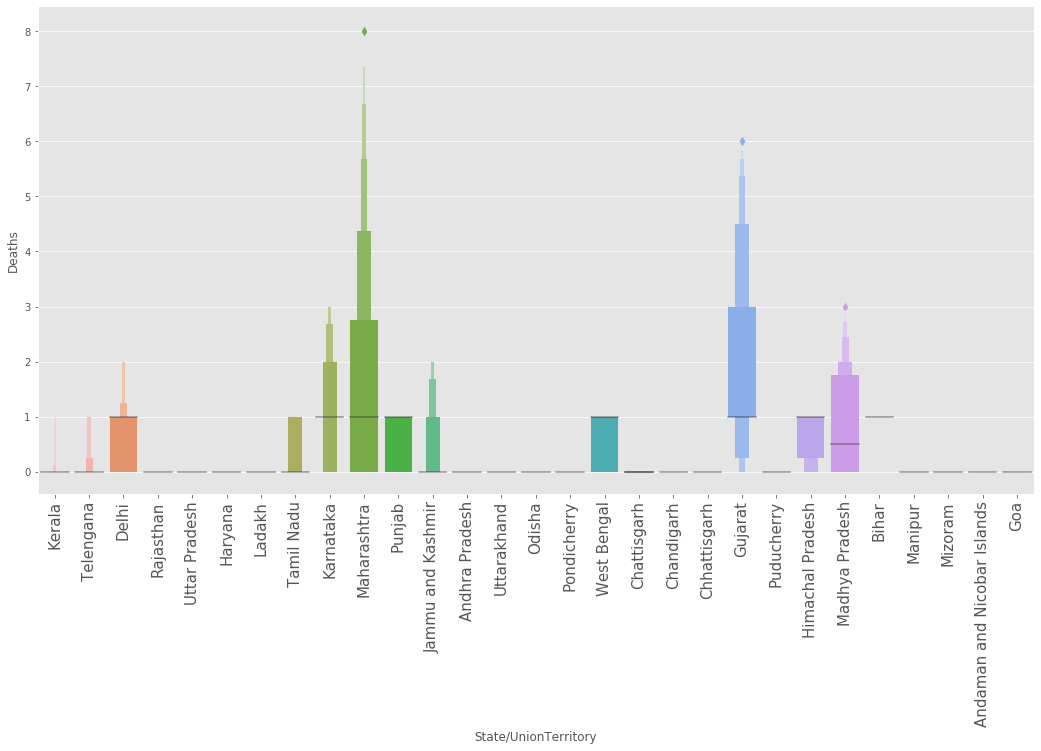

In [382]:
g=sns.catplot(x='State/UnionTerritory',y='Deaths',kind='boxen',data=covid_19)
g.fig.set_figwidth(20)
g.fig.set_figheight(8)
g.set_xticklabels(rotation=90,fontsize=15)

# label encoding

In [383]:
lbl=LabelEncoder()
covid_19["State/UnionTerritory"]=lbl.fit_transform(covid_19["State/UnionTerritory"])


In [384]:
covid_19['date']=covid_19['Date'].dt.day
covid_19['month']=covid_19['Date'].dt.month

In [385]:
tree=DecisionTreeRegressor()
linear=LinearRegression()
logistic=LogisticRegression()
nb=GaussianNB()
forest=RandomForestClassifier()

# splitting training and testing date

In [386]:
x=covid_19[['State/UnionTerritory','date','month','Cured','Deaths','ConfirmedIndianNational','ConfirmedForeignNational']]
y=covid_19['Confirmed']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [388]:
tree.fit(x_train,y_train)
linear.fit(x_train,y_train)
logistic.fit(x_train,y_train)
nb.fit(x_train,y_train)
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# predictions and comparing accuracy

In [405]:
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix
y_pred=tree.predict(x_test)
score1=r2_score(y_test,y_pred)


In [406]:
confusion_matrix(y_test,y_pred)

array([[21,  0,  0, ...,  0,  0,  0],
       [ 0,  8,  1, ...,  0,  0,  0],
       [ 0,  0, 14, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  1],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [407]:
accuracy_score(y_test,y_pred)

0.66

In [408]:
from sklearn.metrics import r2_score
prediction=linear.predict(x_test)
score2=r2_score(y_test,prediction)


In [409]:
from sklearn.metrics import r2_score
prediction=logistic.predict(x_test)
score3=r2_score(y_test,prediction)


In [410]:
from sklearn.metrics import r2_score
prediction=nb.predict(x_test)
score4=r2_score(y_test,prediction)


In [411]:
from sklearn.metrics import r2_score
prediction=forest.predict(x_test)
score5=r2_score(y_test,prediction)


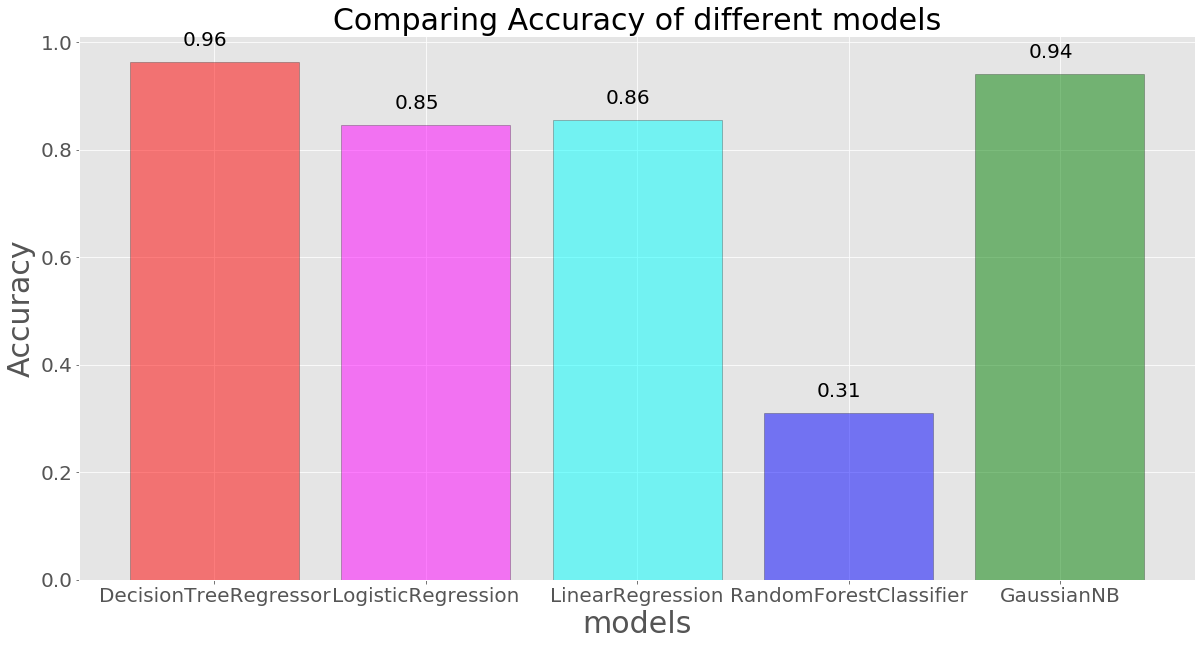

In [412]:
scores=[score1,score2,score3,score4,score5]
models=['DecisionTreeRegressor','LogisticRegression','LinearRegression','RandomForestClassifier','GaussianNB']
plt.figure(figsize=(20,10))
plt.title('Comparing Accuracy of different models',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('models',fontsize=30)
plt.ylabel('Accuracy',fontsize=30)
plt.bar(models,scores,color=['red','magenta','cyan','blue','green'],alpha=0.5,edgecolor='black')
for i,v in enumerate(scores):
    plt.text(i-.15,v+.03,format(scores[i],'.2f'),fontsize=20)

In [ ]:
#from decision tree regressor we get 0.96 acccuracy